   #     Big Mart Sales Analysis

![mov](https://www.ginesys.in/sites/default/files/clients/image/Bigmart%20JPEG.jpg)

# Data description
The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


# Attributes 

-  Item_Identifier : Unique product ID
2.  Item_Weight : Weight of product
3.  Item_Fat_Content : Whether the product is low fat or not
4.  Item_Visibility : % of total display area in store allocated to this product
5.  Item_Type : Category to which product belongs
6.  Item_MRP : Maximum Retail Price (list price) of product
7.  Outlet_Identifier : Unique store ID
8.  Outlet_Establishment_Year : Year in which store was established
9.  Outlet_Size : Size of the store
10. Outlet_Location_Type : Type of city in which store is located
11. Outlet_Type : Grocery store or some sort of supermarket
12. Item_Outlet_Sales : Sales of product in particular store. This is the outcome variable to be predicted.

### We import the dataset

In [1]:
import pandas as pd


In [34]:
df = pd.read_csv('Downloads//Big_mart.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### We find there are missing values in the data

In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Now we will handle the missing values in the dataset

In [4]:
df.mean()

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

### Here we will fill the missing values of the column Item_Weight by filling the null values with the mean values

In [5]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### We fill the null values in Outlet_Size by 'missing'

In [6]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('missing')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,missing,Tier 2,Supermarket Type1,4710.5350


# Feature Engineering - 1
### We perform a small feature engineering for the columns Item_Fat_Content and Item_Visibility

### Here we replace the strings having similar meaning such as LF and low fat with Low Fat and reg with  Regular 

In [7]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','lf':'Low Fat','low fat':'Low Fat'})
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,missing,Tier 2,Supermarket Type1,4710.5350


### Here we fill the values in Item_Visibility column having 0 with the mean values.

In [8]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,missing,Tier 2,Supermarket Type1,4710.5350


# Exploratory Data analysis          

![mov](https://lh3.googleusercontent.com/-wTd2n3vml3M/WvgKuEl8-XI/AAAAAAAABCQ/m1-pVuPk040B_HRg8EvD4itHxCimFDihgCJoC/w1040-h585/IMG-20180419-WA0029.jpg)

### Import packages for Visualisation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe.It takes data, summarizes that data and finds patterns in the data.The key pointers to the Univaraite analysis are to find out the outliers present in the data. We also tend to find the dsitribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis.


## Outlet_Size - Count plot

- From the plot we can infer that a lot of stores of bigmart have not participated in the survey
2. The number of medium sized and small sized stores are high in number
3. Stores which are large are very few in number

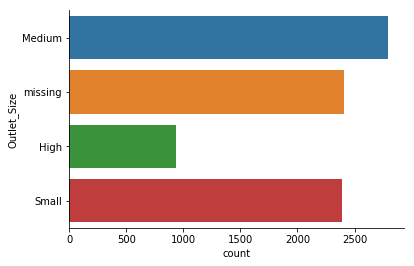

In [10]:
sns.countplot(y="Outlet_Size", data=df)
sns.despine()

## Item_Fat_Content - Count Plot

- The stores have only 2 categories for the Fat_Content.
2. Items in the Low Fat category are more in number as comapared to Regular ones.

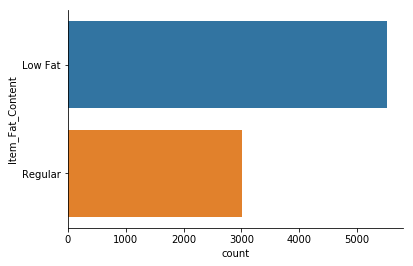

In [11]:
sns.countplot(y = 'Item_Fat_Content', data = df)
sns.despine()

## Outlet_Type - Count PLot

- Number of stores of Supermarket Type1 is high.
2. From this plot we infer that the Grocery Store are the 2nd most common type of stores. 
3. Stores of other types i.e. Supermarket Type2 and Supermarket Type3 are few in number.

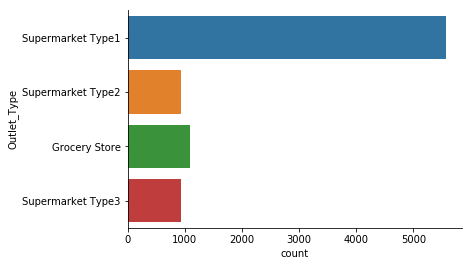

In [12]:
sns.countplot(y = 'Outlet_Type', data = df)
sns.despine()

## Outlet_Establishment_Year - Count Plot

- From the plot we can infer that most no. of Stores were established in the year 1985.
2. Every year from 1985-2009 the number of stores established are same except 1985 and 1988.
3. Number of stores established in the year 1988 is drastically low.


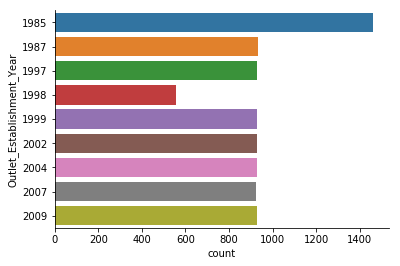

In [13]:
sns.countplot(y = 'Outlet_Establishment_Year', data = df)
sns.despine()

## Outlet_Location_Type - Count Plot

- Tier 1(most urban) locations have the least number of stores.
2. Tier 3 locations have most number of stores.


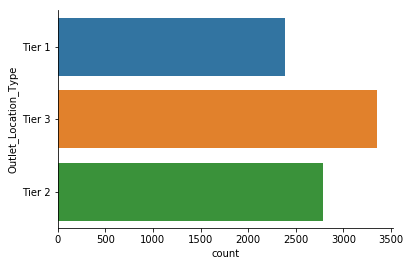

In [14]:
sns.countplot(y = 'Outlet_Location_Type', data = df)
sns.despine()

## Item_Type - Count Plot

- From the plot we can infer that the quantity of seafood item is the least.
2. The quantity of 'Fruits and Vegetables' and 'Snack Foods' are very high.
3. So we can infer that the items having large qauntites of stock are consumed highly.

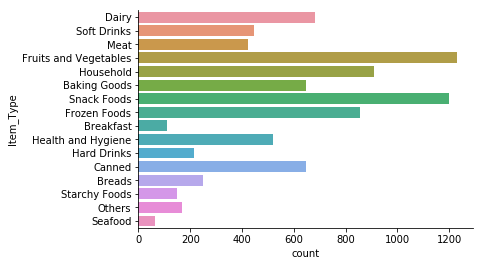

In [15]:
sns.countplot(y = 'Item_Type', data = df)
sns.despine()

## Item_Visibility - Count plot

- From the plot we can observe that it is left skewed.
2. Item visibility from 0.01 to 0.10 is high.

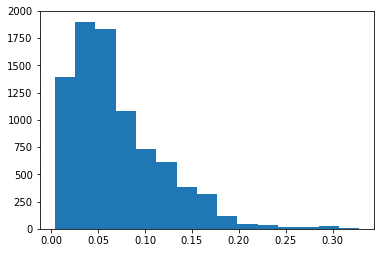

In [16]:
plt.hist(x = 'Item_Visibility',data = df,bins = 15)
plt.rc("axes.spines", top=False, right=False)

## Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.


## Co-relation

In [17]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


## Co-relation Heatmap

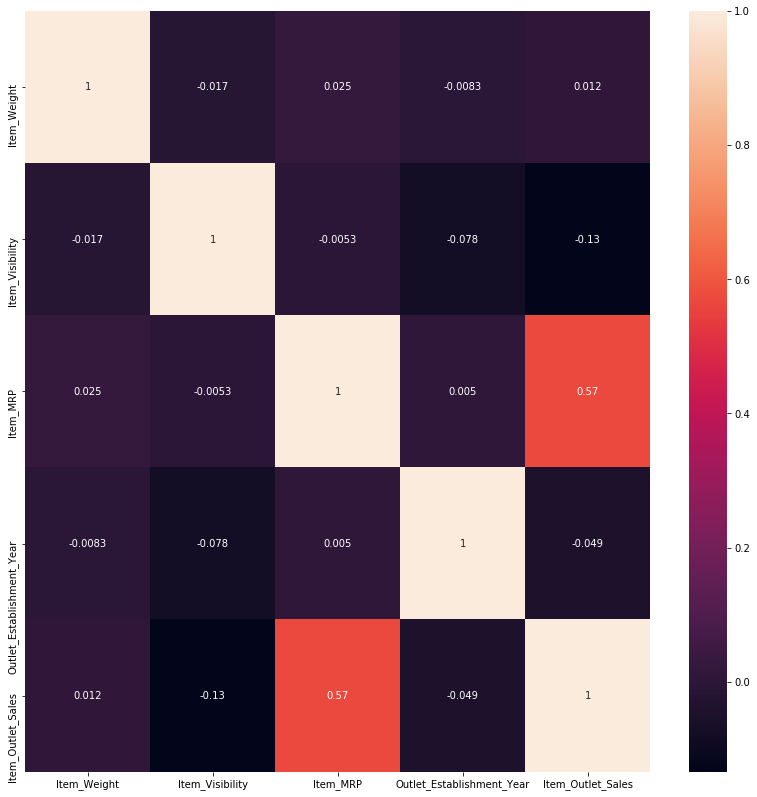

In [18]:
plt.figure(figsize =(14,14))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Item_Outlet_Sales vs Item_Visibility 
### We comapre Item_Outlet_Sales and Item_Visibility

- From the plot we can observe a decreasing trend.
2. Most number of sample data are present in the visibility range of 0.05 to 0.15

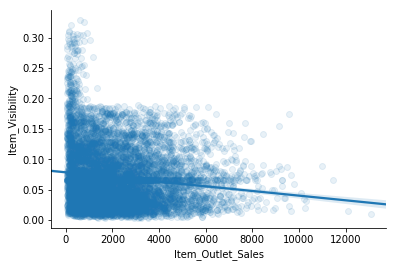

In [19]:
sns.regplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = df , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()


## Item_MRP vs Item_outlet_Sales 
### We compare the Item_MRP with the Item_Outlet_Sales 

- From the plot we can infer that there is an increasing trend observed.
2. We also can see that high MRP goods have high sales.
3. The number of samples for high MRP goods is less in number.

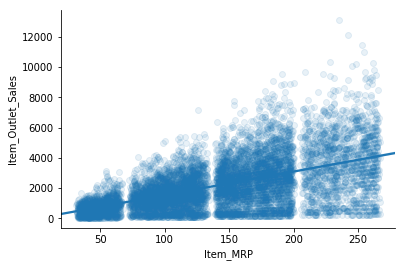

In [20]:
sns.regplot(x = 'Item_MRP',y ='Item_Outlet_Sales',data = df , x_jitter=0.2, scatter_kws={'alpha':0.1})
sns.despine()

# Multi-Variate Analysis
Multivariate analysis (MVA) is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.
## Item_Outlet_Sales vs Item_MRP in terms of Outlet_Establishment_Year

- From the plots below we can infer that most no. of samples are present for establishment year 1985. We can also observe that items having higher MRP have higher outlet sales.

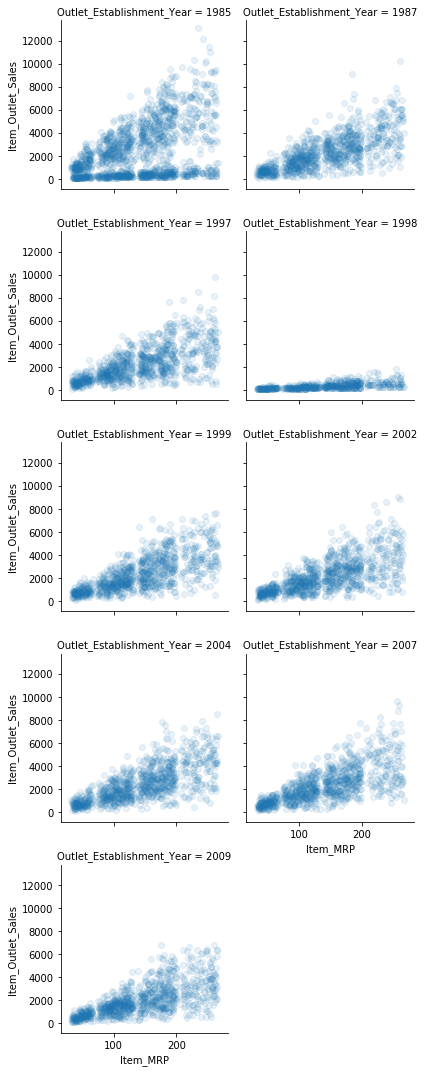

In [21]:
grid = sns.FacetGrid(df, col='Outlet_Establishment_Year',col_wrap = 2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.1)
sns.despine()


# Feature Engineering - 2

### Here we convert the string datatypes of certain columns to numeric ones.

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

li = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Fat_Content','Outlet_Identifier']
for i in li:
    df[i] = le.fit_transform(df[i])
    
df.head()
    

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.066132,Fruits and Vegetables,182.0950,0,1998,3,2,0,732.3800
4,NCD19,8.93,0,0.066132,Household,53.8614,1,1987,0,2,1,994.7052


### We create dummy columns for the column Outlet_Identifier and drop the columns which are not required for our training purpose along with the label column for obvious reason

In [46]:
dum = pd.get_dummies(df['Outlet_Identifier'])
df1 = pd.concat([df,dum],axis=1)

label = df1['Item_Outlet_Sales']

train = df1.drop(columns=['Item_Identifier','Item_Weight','Item_Outlet_Sales','Item_Type','Outlet_Establishment_Year'])


# Application of Regression models

## Splitting the data for training and testing

In [33]:
from sklearn.cross_validation import train_test_split

x_train , x_test , y_train , y_test = train_test_split(train , label , test_size = 0.40,random_state = 101)

##  Linear Regression

### Preparing the model and importing necessary packages 

In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

### Fitting the model 

In [27]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Here we find the accuracy score of our Linear Regression model

In [28]:
reg.score(x_test,y_test)

0.5680699358011244

## GradientBoostingRegressor 

### Preparing the model and importing necessary packages

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor(n_estimators = 100)



### Fitting the model

In [30]:
grad.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### Here we find the accuracy score of our GradientBoostingRegressor model

In [31]:
grad.score(x_test, y_test)

0.6050938021101405

## RandomForestRegressor

### Preparing the model and importing necessary packages

In [45]:
from sklearn.ensemble import RandomForestRegressor

ran = RandomForestRegressor(n_estimators = 50)

### Fitting the model

In [43]:
ran.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Here we find the accuracy score of our RandomForestRegressor model

In [44]:
ran.score(x_test, y_test)


0.5431214249886573

# Conclusion :-

We were given a dataset of Bigmart for predicting it's output sales.We proceed first with handling missing values in the dataset as it may have a effect on our prediction of output sales. Then we perform the first feature engineering for the dataset. 

Now we explore the data through visualisations using required packages plotting some graphs and making inferences about our dataset from them.

After the EDA we perform some feature engineering for the second time this time for passing the columns to the models.Now we use some models available in the sklearn module of Python for our prediction of output sales.

The first model we use is Linear Regression
- accuracy : 0.56

The Second model we use is  GradientBoostingRegressor 
- accuracy : 0.60

The third model used is RandomForestRegressor 
- accuracy : 0.54

From the above three models which have been used for analysis we find that GradientBoostingRegressor is the best among the three.
So we can conclude that boosting algorithms are quite good for most of the cases.


